# Car Price Prediction with ML

✅ This assignment is completed by `Mohammad Khorshed Alam`

---

In [308]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [309]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [310]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

# Data Exploration & Error Handling

In [311]:
df.shape

(202, 26)

In [312]:
# Checking for duplicated rows
df.duplicated().sum()

np.int64(1)

In [313]:
# Droping duplicated row
df.drop_duplicates(inplace=True)

In [314]:
df.duplicated().sum()

np.int64(0)

In [315]:
df.shape

(201, 26)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

⭐ **Conclusions:**

The features `bore`, `stroke`, `horsepower`, and `peak-rpm` contain quantitative measurements that should be represented as numerical data types. Currently, these columns are incorrectly classified as object/string types in the dataset.

⭐ **Recommended Action:**

We need to convert these columns to appropriate numerical data types (float64 or Int64) while handling any non-numeric values or missing data appropriately.

In [317]:
# Converting to numeric data type
cols = ['bore', 'stroke', 'horsepower', 'peak-rpm']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [318]:
# Checking for null values
df.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [319]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [320]:
num_cols = df.select_dtypes(include=['int', 'float']) # Numerical features
cat_cols = df.select_dtypes(include='object') # Categorical features

print(f'Number of numerical features: {num_cols.shape[1]}')
print(f'Number of categorical features: {cat_cols.shape[1]}')


Number of numerical features: 16
Number of categorical features: 10


⭐ **Conclusions:**
- Total values 201 and Total columns (features) 26 (initially was 202, 26).
- There was one duplicated row, which was dropped.
- 37 null values in `normalized-losses` feature, 2 in `num-of-doors`, 4 in `bore`, 4 in `stroke`, 2 in `horsepower`, and 2 in `peak-rpm`.
- In this dataset, there are 16 numerical features and 10 categorical features.

## Missing Value Handling

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### For normalized-losses Feature
- 37 missing values in this feature

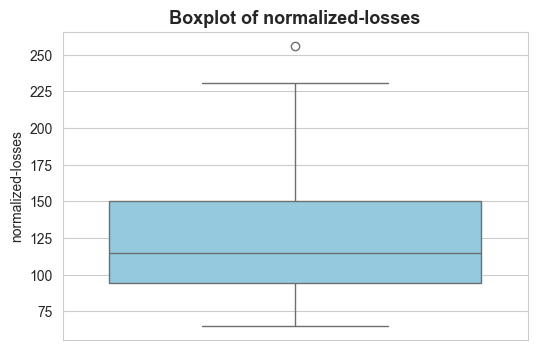

In [322]:
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='normalized-losses', color='skyblue')
plt.title('Boxplot of normalized-losses', fontsize=13, fontweight='bold')
plt.show()

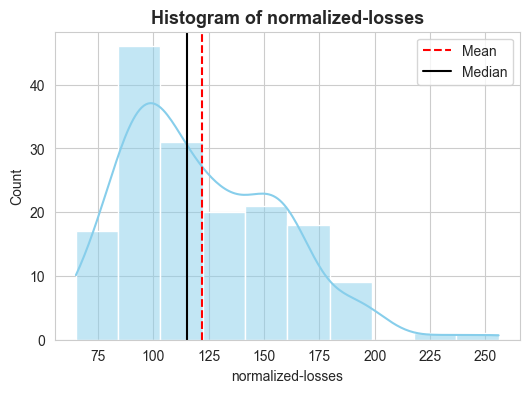

In [323]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='normalized-losses', color='skyblue', kde=True)
plt.axvline(df['normalized-losses'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['normalized-losses'].median(), color='black', label='Median')
plt.title('Histogram of normalized-losses', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is lower than mean, hence it is better to fill the null values with median.

In [324]:
median = df['normalized-losses'].median()
median

np.float64(115.0)

In [325]:
# Filling the missing values
df['normalized-losses'].fillna(median, inplace=True)

In [326]:
df['normalized-losses'].isna().sum()

np.int64(0)

### For num-of-doors Feature
- 2 missing values in this feature

In [327]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

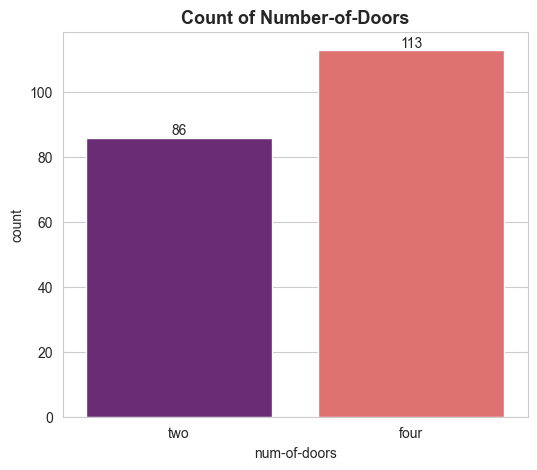

In [328]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='num-of-doors', palette='magma')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Count of Number-of-Doors', fontsize=13, fontweight='bold')
plt.show()

`Four` doors are more frequent than `Two` in this dataset. That is why, it would be better to fill the missing values with `Four`. 

In [329]:
most_freq = df['num-of-doors'].mode()[0]
most_freq

'four'

In [330]:
# Filling the missing values
df['num-of-doors'].fillna(most_freq, inplace=True)

In [331]:
df['num-of-doors'].isna().sum()

np.int64(0)

### For bore Feature
- 4 missing values in this feature

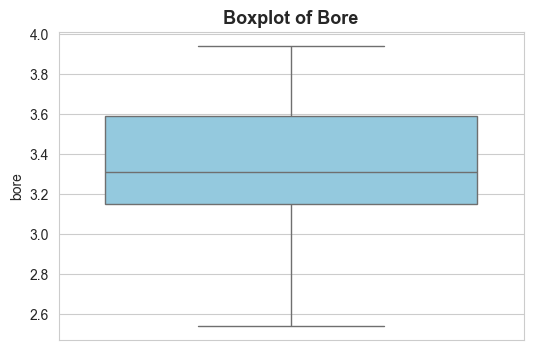

In [332]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='bore', color='skyblue')
plt.title('Boxplot of Bore', fontsize=13, fontweight='bold')
plt.show()

There is not outlier in this feature, hence missing values can be filled by its mean.

In [333]:
mean = df['bore'].mean()
mean

np.float64(3.330710659898477)

In [334]:
# Filling the missing values
df['bore'].fillna(mean, inplace=True)

In [335]:
df['bore'].isna().sum()

np.int64(0)

### For stroke Feature
- 4 missing values in this feature

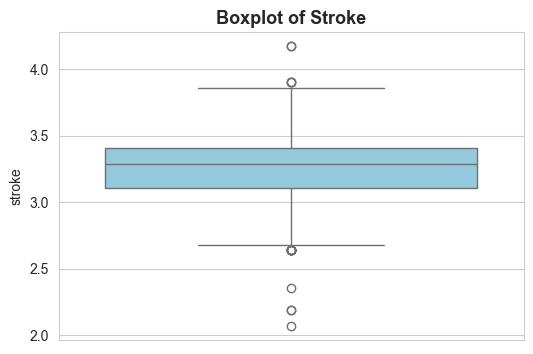

In [336]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='stroke', color='skyblue')
plt.title('Boxplot of Stroke', fontsize=13, fontweight='bold')
plt.show()

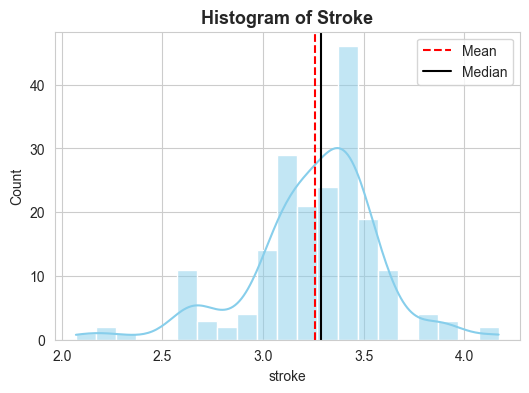

In [337]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='stroke', color='skyblue', kde=True)
plt.axvline(df['stroke'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['stroke'].median(), color='black', label='Median')
plt.title('Histogram of Stroke', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is higher than mean, hence it is better to fill the null values with median.

In [338]:
median = df['stroke'].median()
median

np.float64(3.29)

In [339]:
# Filling the missing values
df['stroke'].fillna(median, inplace=True)

In [340]:
df['stroke'].isna().sum()

np.int64(0)

### For horsepower Feature
- 2 missing values in this feature

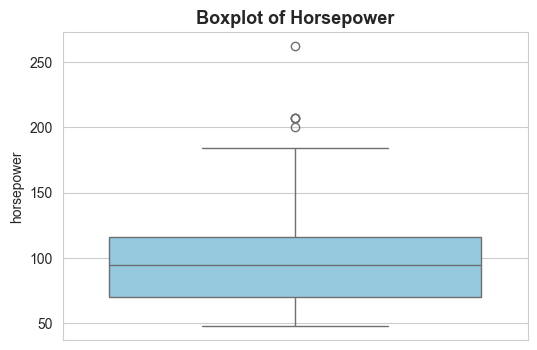

In [341]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='horsepower', color='skyblue')
plt.title('Boxplot of Horsepower', fontsize=13, fontweight='bold')
plt.show()

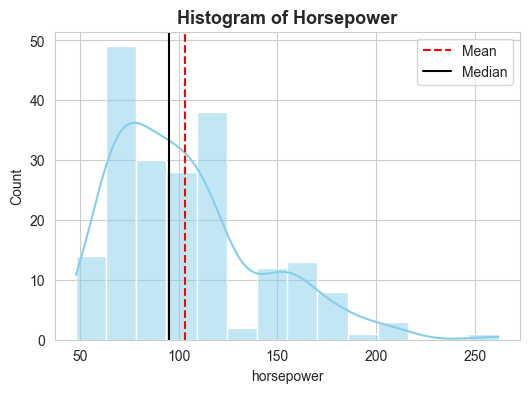

In [342]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='horsepower', color='skyblue', kde=True)
plt.axvline(df['horsepower'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['horsepower'].median(), color='black', label='Median')
plt.title('Histogram of Horsepower', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is lower than mean, hence it is better to fill the null values with median.

In [343]:
median = df['horsepower'].median()
median

np.float64(95.0)

In [344]:
# Filling the missing values
df['horsepower'].fillna(median, inplace=True)

In [345]:
df['horsepower'].isna().sum()

np.int64(0)

### For peak-rpm Feature
- 2 missing values in this feature

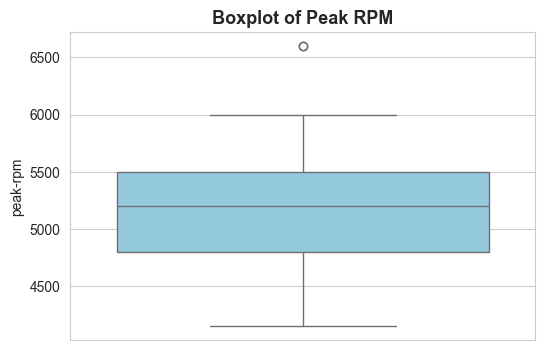

In [346]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='peak-rpm', color='skyblue')
plt.title('Boxplot of Peak RPM', fontsize=13, fontweight='bold')
plt.show()

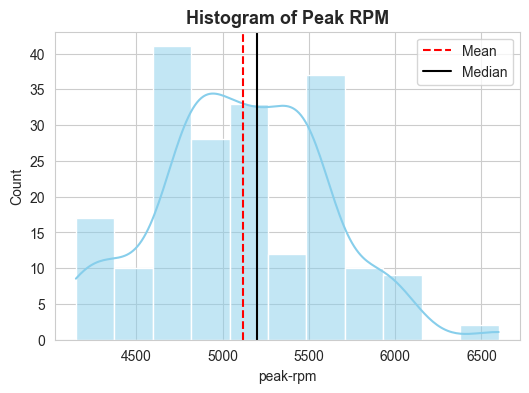

In [347]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='peak-rpm', color='skyblue', kde=True)
plt.axvline(df['peak-rpm'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['peak-rpm'].median(), color='black', label='Median')
plt.title('Histogram of Peak RPM', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is higher than mean, hence it is better to fill the null values with median.

In [348]:
median = df['peak-rpm'].median()
median

np.float64(5200.0)

In [349]:
# Filling the missing values
df['peak-rpm'].fillna(median, inplace=True)

In [350]:
df['peak-rpm'].isna().sum()

np.int64(0)

⭐ **Conclusions:**
- Total 51 missing values were in this dataset.
- 37 null values of `normalized-losses` feature was filled with its median.
- 2 null values of `num-of-doors` feature was filled with its mode.
- 4 null values of `bore` feature was filled with its mean.
- 4 null values of `stroke` feature was filled with its median.
- 2 null values of `horsepower` feature was filled with its median.
- 2 null values of `peak-rpm` feature was filled with its median.

# EDA

## Categorical column

- There are 10 categorical features in this dataset.

In [351]:
cat_cols.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### For `make` features

In [352]:
len(df['make'].unique())

22

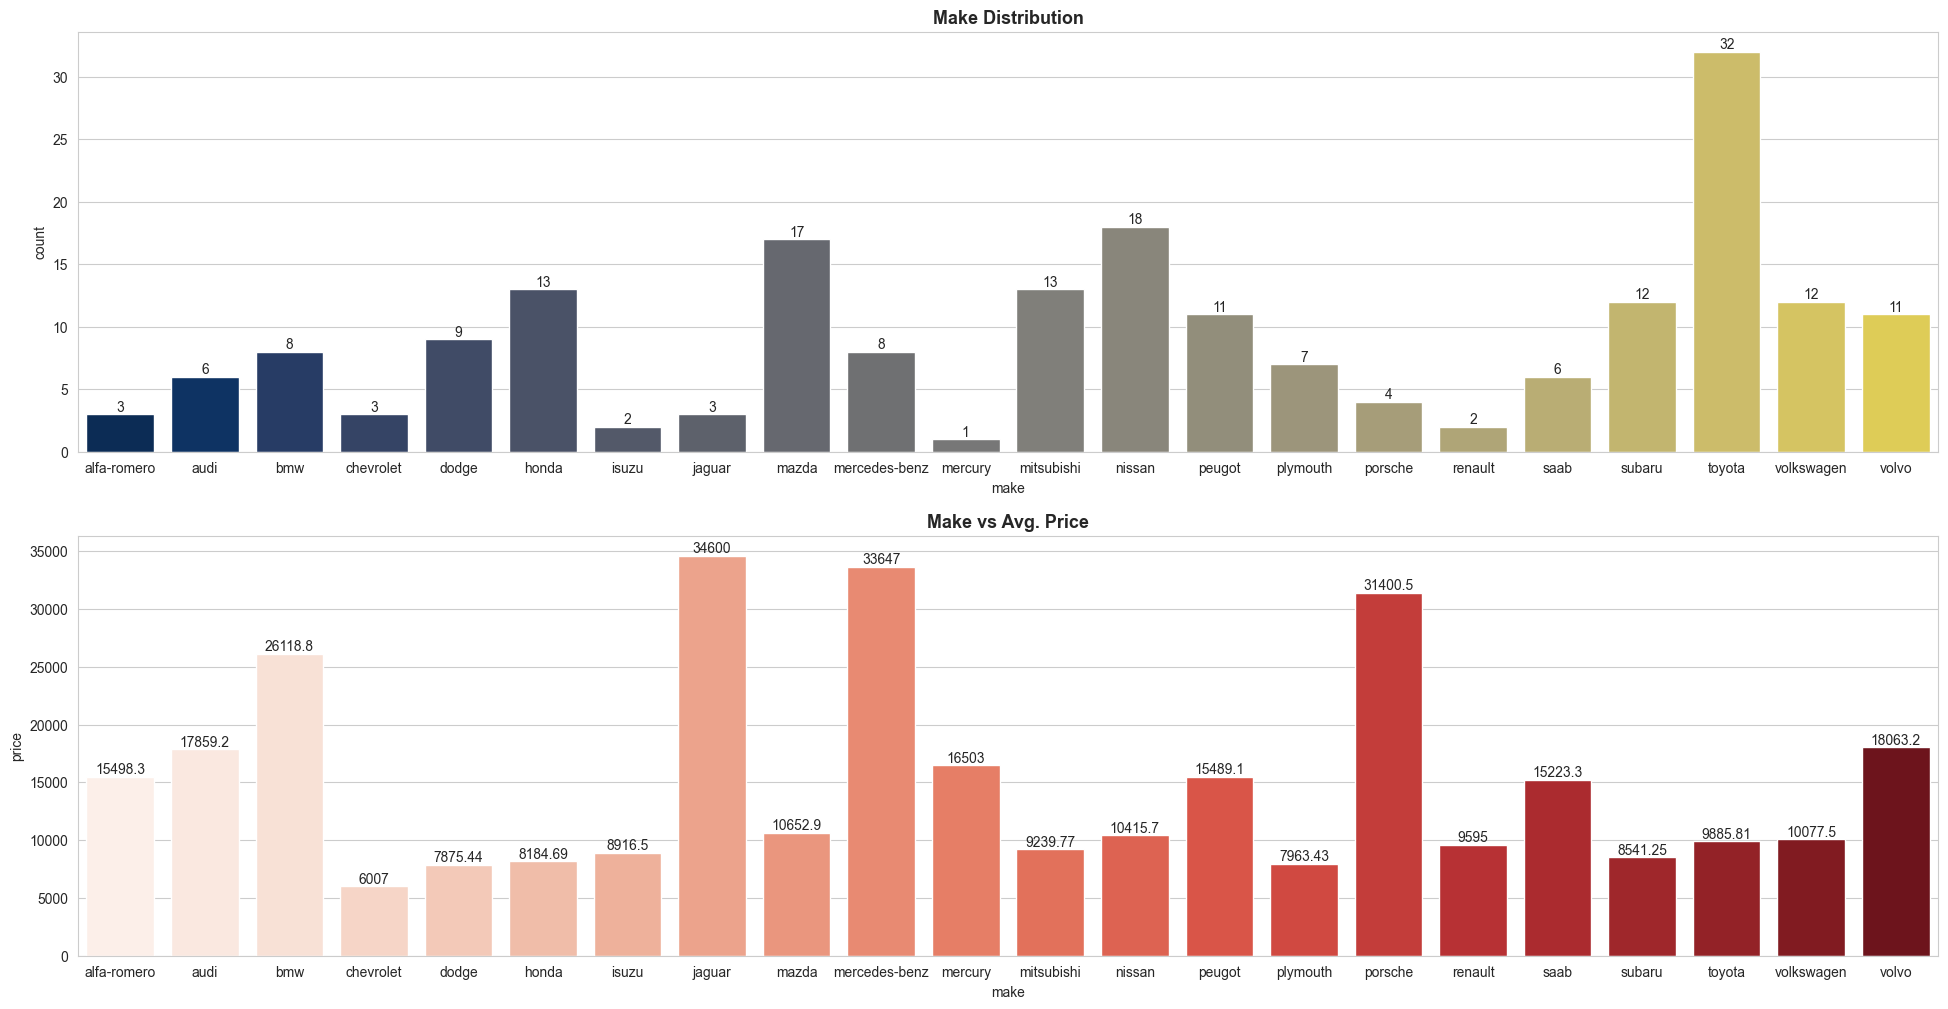

In [353]:
plt.figure(figsize=(24, 12))

plt.subplot(211)
ax = sns.countplot(data=df, x='make', palette='cividis')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Make Distribution', fontsize=13, fontweight='bold')

plt.subplot(212)
ax = sns.barplot(data=df, x='make', y='price', palette='Reds', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Make vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 22 categories
- Price highly depends on this feature.
- Binary Encoding is suitable for this feature.

### For `fuel-type` features

In [354]:
len(df['fuel-type'].unique())

2

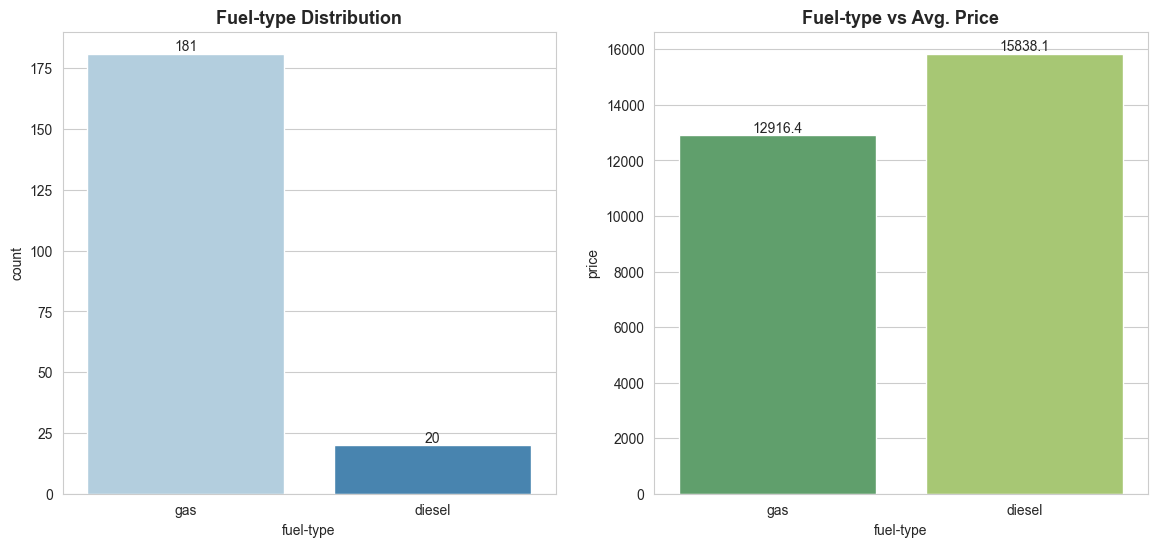

In [355]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='fuel-type', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-type Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='fuel-type', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-type vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `aspiration` features

In [356]:
len(df['aspiration'].unique())

2

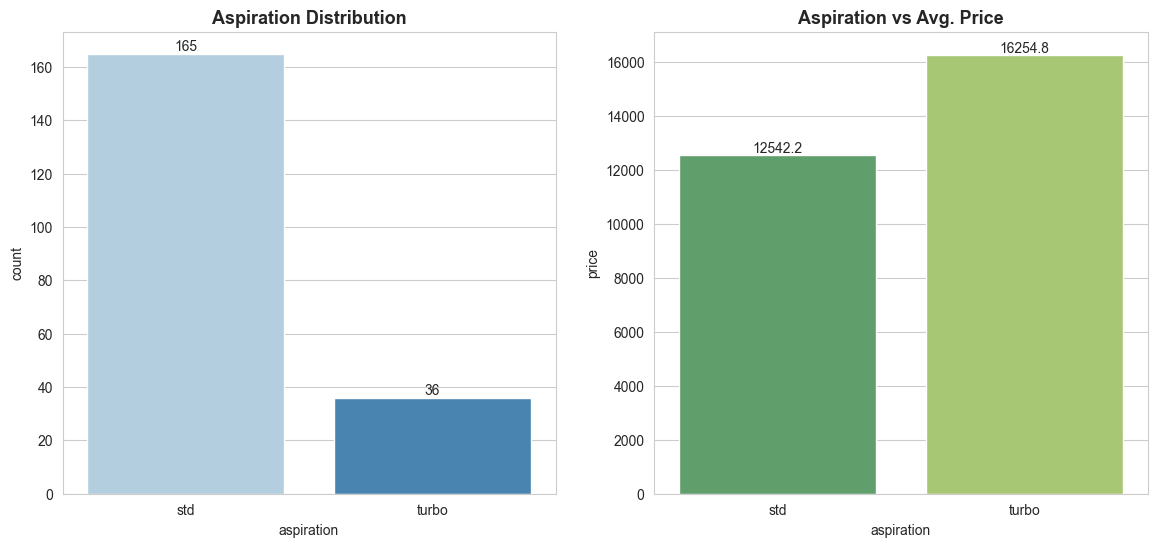

In [357]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='aspiration', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Aspiration Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='aspiration', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Aspiration vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price depends on this feature.
- Binary Encoding is suitable for this feature.

### For `num-of-doors` features

In [358]:
len(df['num-of-doors'].unique())

2

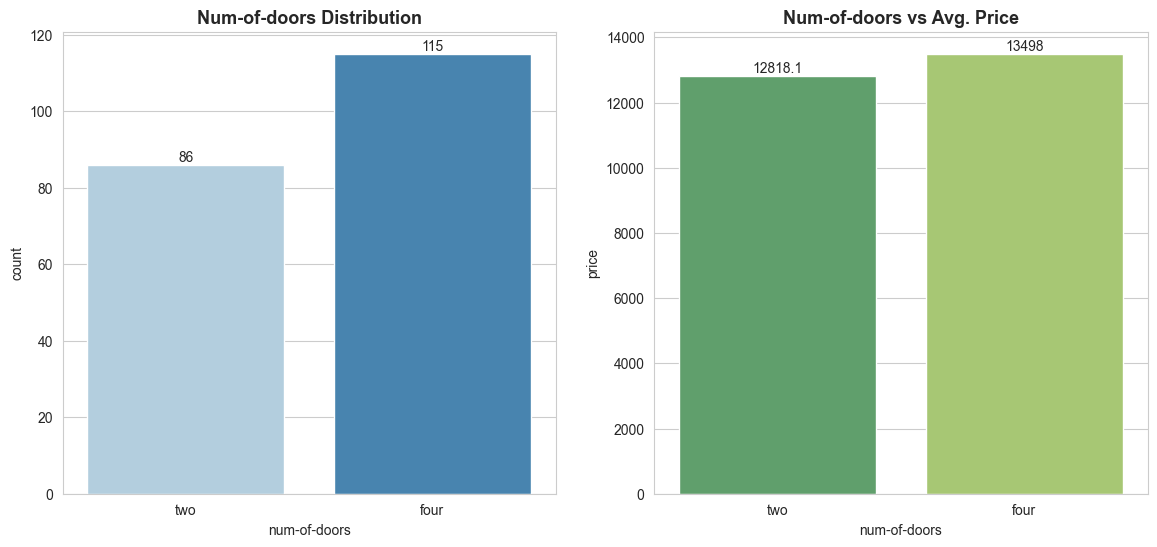

In [359]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='num-of-doors', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-doors Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='num-of-doors', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-doors vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price slightly depends on this feature.
- This feature is skipable.
- One-Hot Encoding is suitable for this feature.

### For `body-style` features

In [360]:
len(df['body-style'].unique())

5

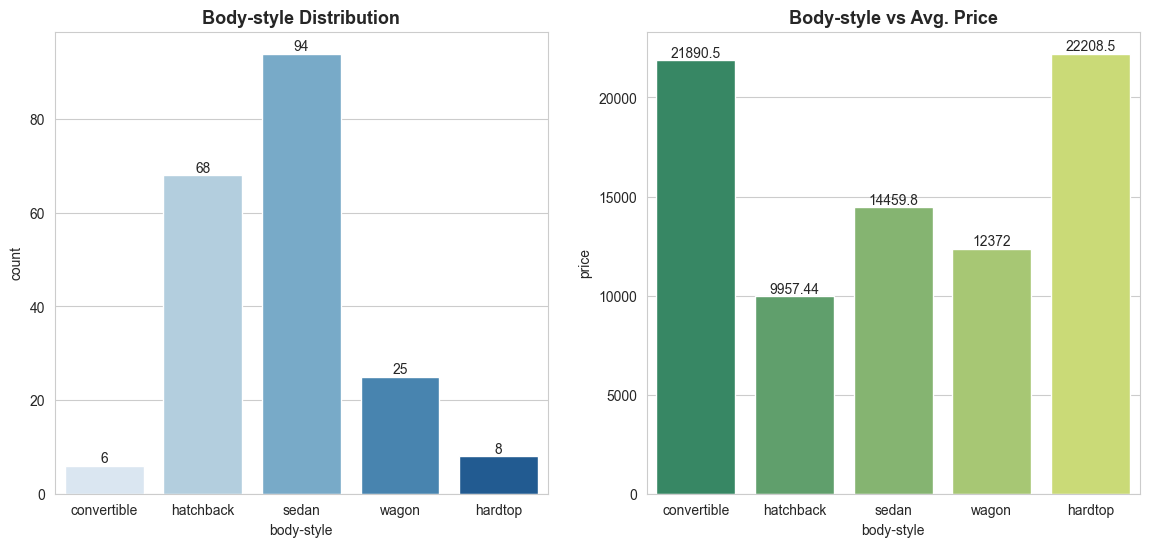

In [361]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='body-style', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Body-style Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='body-style', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Body-style vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 5 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `drive-wheels` features

In [362]:
len(df['drive-wheels'].unique())

3

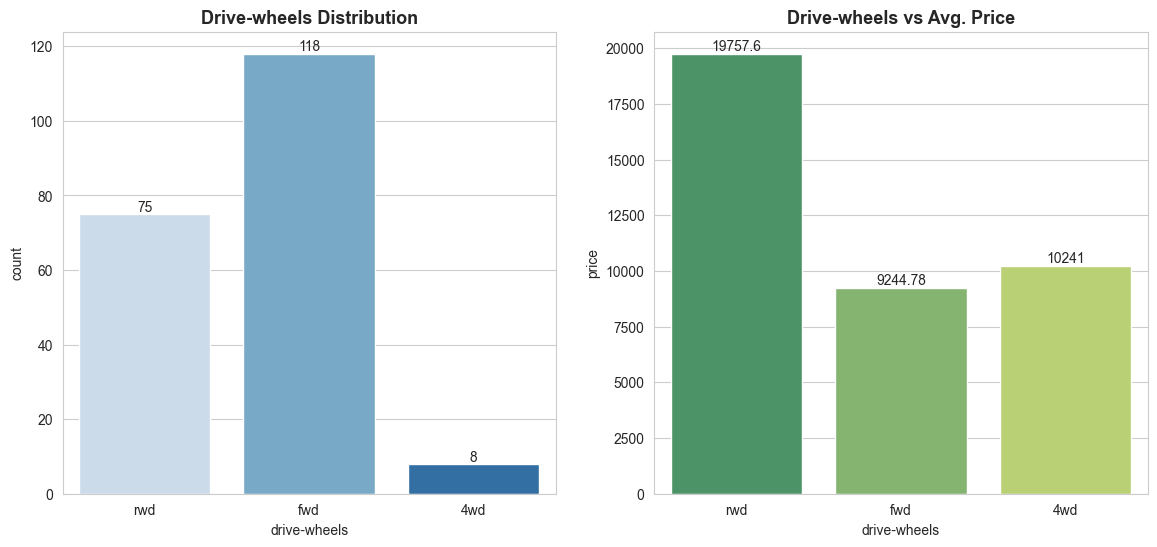

In [363]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='drive-wheels', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Drive-wheels Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='drive-wheels', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Drive-wheels vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 3 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `engine-location` features

In [364]:
len(df['engine-location'].unique())

2

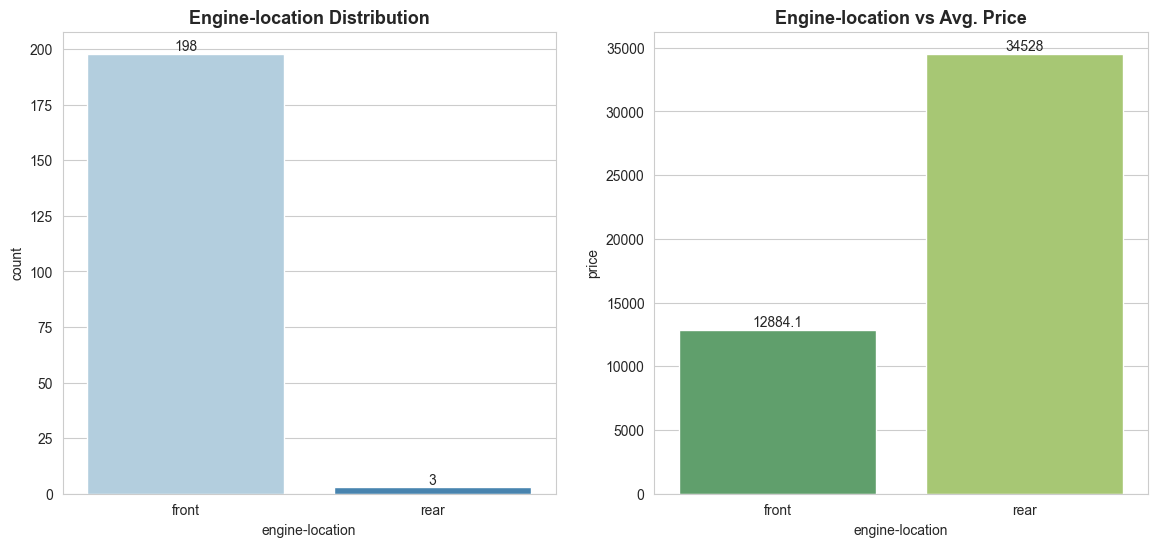

In [365]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='engine-location', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-location Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='engine-location', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-location vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 2 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `engine-type` features

In [366]:
len(df['engine-type'].unique())

6

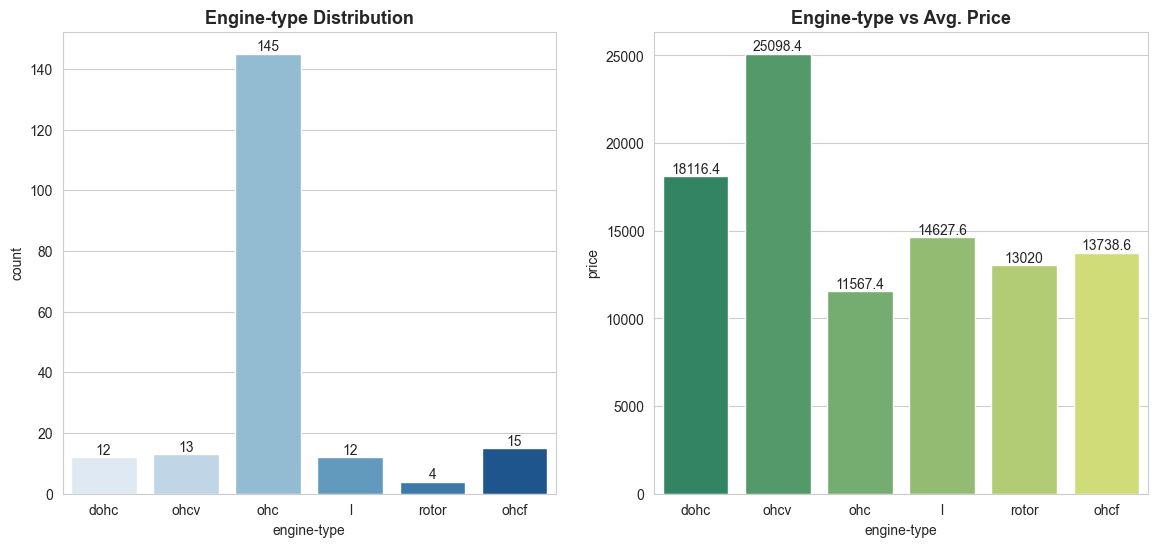

In [367]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='engine-type', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-type Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='engine-type', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Engine-type vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 6 categories
- Price highly depends on this feature.
- One-Hot Encoding is suitable for this feature.

### For `num-of-cylinders` features

In [368]:
len(df['num-of-cylinders'].unique())

7

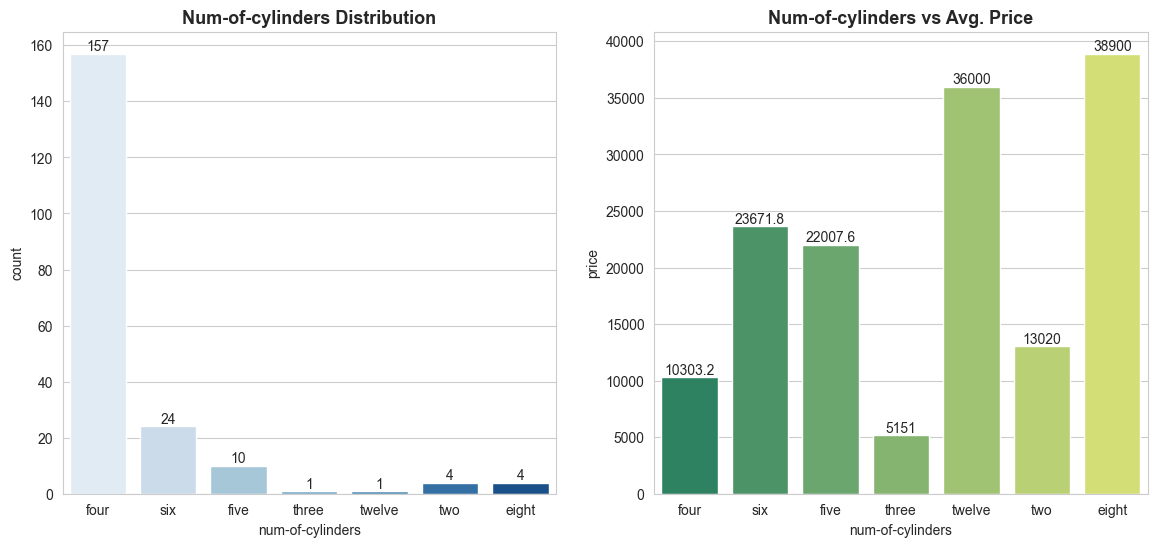

In [369]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='num-of-cylinders', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-cylinders Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='num-of-cylinders', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Num-of-cylinders vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 7 categories
- Price highly depends on this feature.
- Ordinal Encoding is suitable for this feature.

### For `fuel-system` features

In [370]:
len(df['fuel-system'].unique())

8

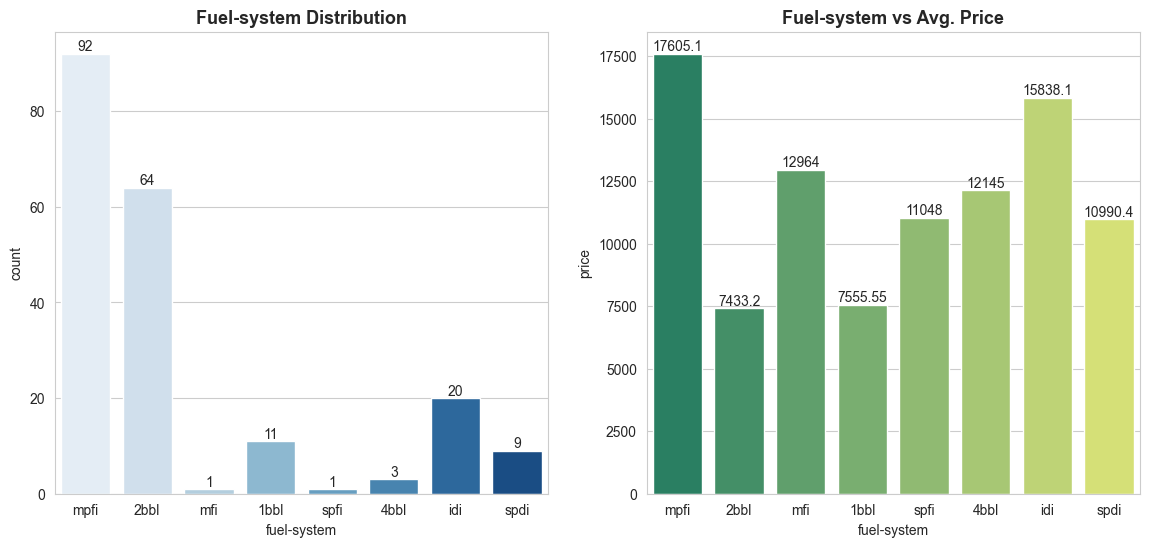

In [371]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.countplot(data=df, x='fuel-system', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-system Distribution', fontsize=13, fontweight='bold')

plt.subplot(122)
ax = sns.barplot(data=df, x='fuel-system', y='price', palette='summer', ci=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Fuel-system vs Avg. Price', fontsize=13, fontweight='bold')

plt.show()

⭐ **Conclusions:**
- 7 categories
- Price highly depends on this feature.
- Ordinal Encoding is suitable for this feature.